## Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Set Paths and Parameters

In [5]:
data_dir = 'data/garbage_images'  
img_height, img_width = 150, 150
batch_size = 32


## Image Preprocessing and Augmentation

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


## Visualize Sample Images

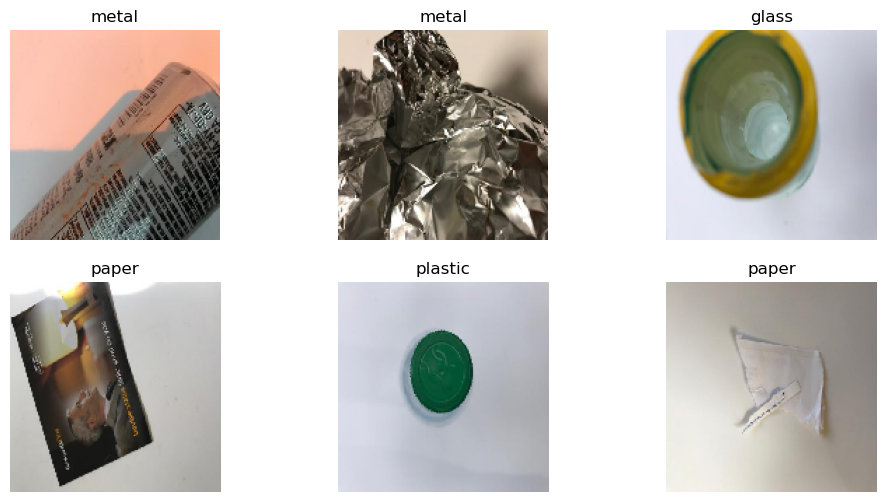

In [7]:
class_names = list(train_data.class_indices.keys())

plt.figure(figsize=(12, 6))
for images, labels in train_data:
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break


## Check Number of Images per Class

cardboard: 403 images
glass: 501 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images


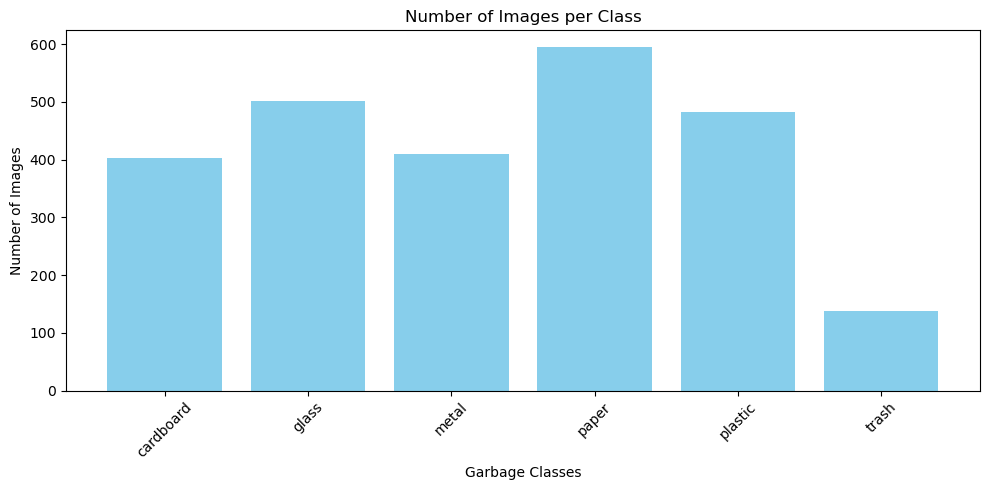

In [28]:
import os
import matplotlib.pyplot as plt


data_dir = 'data/garbage_images'

# List class names
class_names = os.listdir(data_dir)

# Count images in each class
class_counts = {class_name: len(os.listdir(os.path.join(data_dir, class_name)))
                for class_name in class_names}

# Print counts
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Plotting
plt.figure(figsize=(10,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Garbage Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Print Image Dimensions

In [9]:
for images, labels in train_data:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break


Image batch shape: (32, 150, 150, 3)
Label batch shape: (32, 6)


## Build the CNN Model

In [10]:
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  
])


## Compile the Model

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


 ## Train the Model

In [14]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


C:\Users\LHCP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 458ms/step - accuracy: 0.2469 - loss: 2.3149 - val_accuracy: 0.3280 - val_loss: 1.5473
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - accuracy: 0.4326 - loss: 1.4349 - val_accuracy: 0.5467 - val_loss: 1.2572
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.5244 - loss: 1.1804 - val_accuracy: 0.5487 - val_loss: 1.1615
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 385ms/step - accuracy: 0.6545 - loss: 0.9257 - val_accuracy: 0.5924 - val_loss: 1.1646
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 401ms/step - accuracy: 0.7070 - loss: 0.7952 - val_accuracy: 0.5865 - val_loss: 1.1961
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 408ms/step - accuracy: 0.8297 - loss: 0.5112 - val_accuracy: 0.5924 - val_loss: 1.2540
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 417ms/step - accuracy: 0.8839 - loss: 0.3777 - val_accuracy: 0.6163 - val_loss: 1.3884
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 424ms/step - accuracy: 0.9240 - loss: 0.2617 - val_accu

## Plot Accuracy and Loss Graph

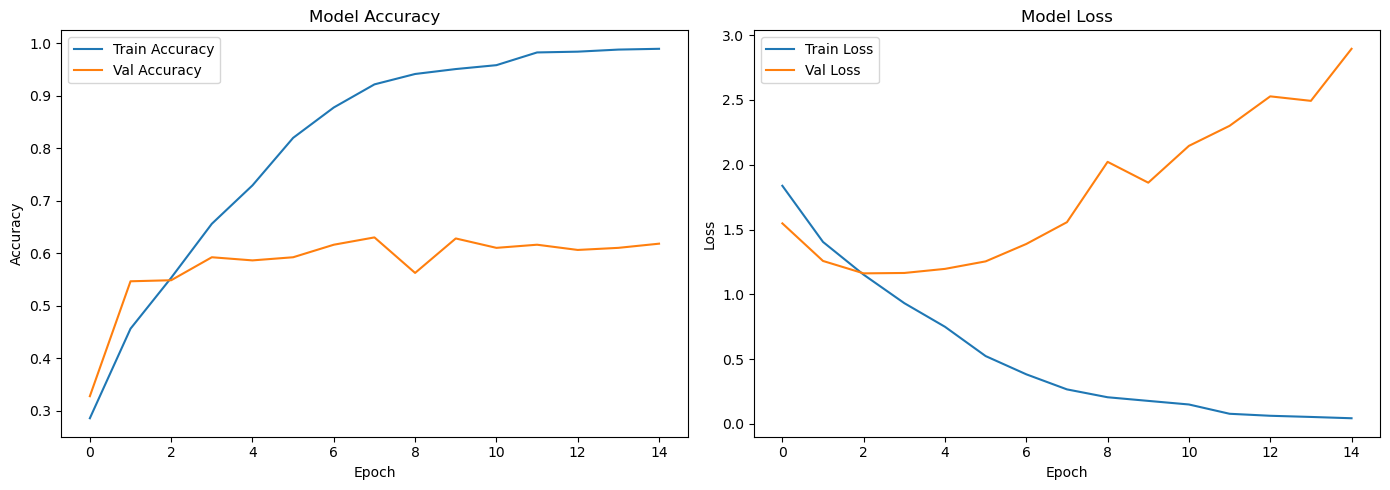

In [15]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Final Testing on Sample Image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


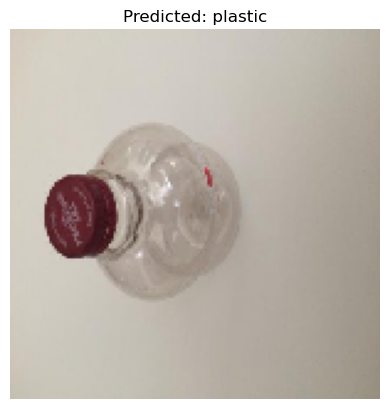

In [17]:
from tensorflow.keras.preprocessing import image

img_path = 'data/garbage_images/plastic/plastic_001.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


## Save the Trained Model

In [18]:
model.save('garbage_classification_model.h5')
print("Model saved successfully.")


Model saved successfully.


#  Week 2: Model Evaluation, Confusion Matrix, and Multiple Image Testing
In this phase, we will:
- Load the saved model
- Evaluate model performance on validation set
- Plot confusion matrix and classification report
- Test predictions on multiple images


## Load the saved model

In [19]:
from tensorflow.keras.models import load_model

model = load_model('garbage_classification_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


## Compile the model

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Evaluate the model on validation data

In [27]:
val_loss, val_acc = model.evaluate(val_data)
print(f" Validation Accuracy: {val_acc * 100:.2f}%")
print(f" Validation Loss: {val_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.6465 - loss: 2.8110
 Validation Accuracy: 61.83%
 Validation Loss: 2.8948


## Show Classification Report and Confusion Matrix


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


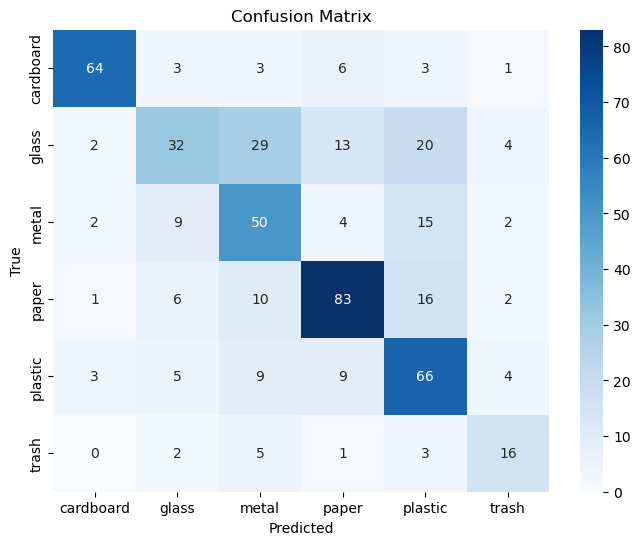

              precision    recall  f1-score   support

   cardboard       0.89      0.80      0.84        80
       glass       0.56      0.32      0.41       100
       metal       0.47      0.61      0.53        82
       paper       0.72      0.70      0.71       118
     plastic       0.54      0.69      0.60        96
       trash       0.55      0.59      0.57        27

    accuracy                           0.62       503
   macro avg       0.62      0.62      0.61       503
weighted avg       0.63      0.62      0.61       503



In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get true labels and predictions
val_labels = []
val_preds = []

# Get predictions on validation data
for i in range(len(val_data)):
    x_batch, y_batch = val_data[i]
    preds = model.predict(x_batch)
    val_preds.extend(np.argmax(preds, axis=1))
    val_labels.extend(np.argmax(y_batch, axis=1))

# Generate confusion matrix
cm = confusion_matrix(val_labels, val_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(val_labels, val_preds, target_names=class_names, zero_division=1)
print(report)


## Final Testing on Sample Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


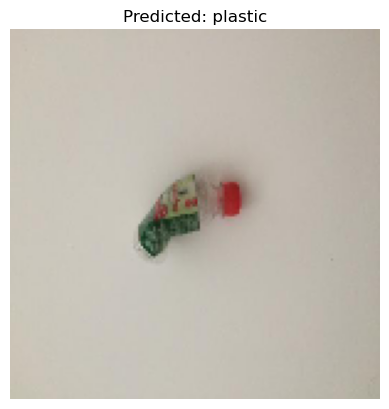

In [25]:
img_path = 'data/garbage_images/plastic/plastic_003.jpg'  
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


## Predict Multiple Images from Dataset (Garbage Classification)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


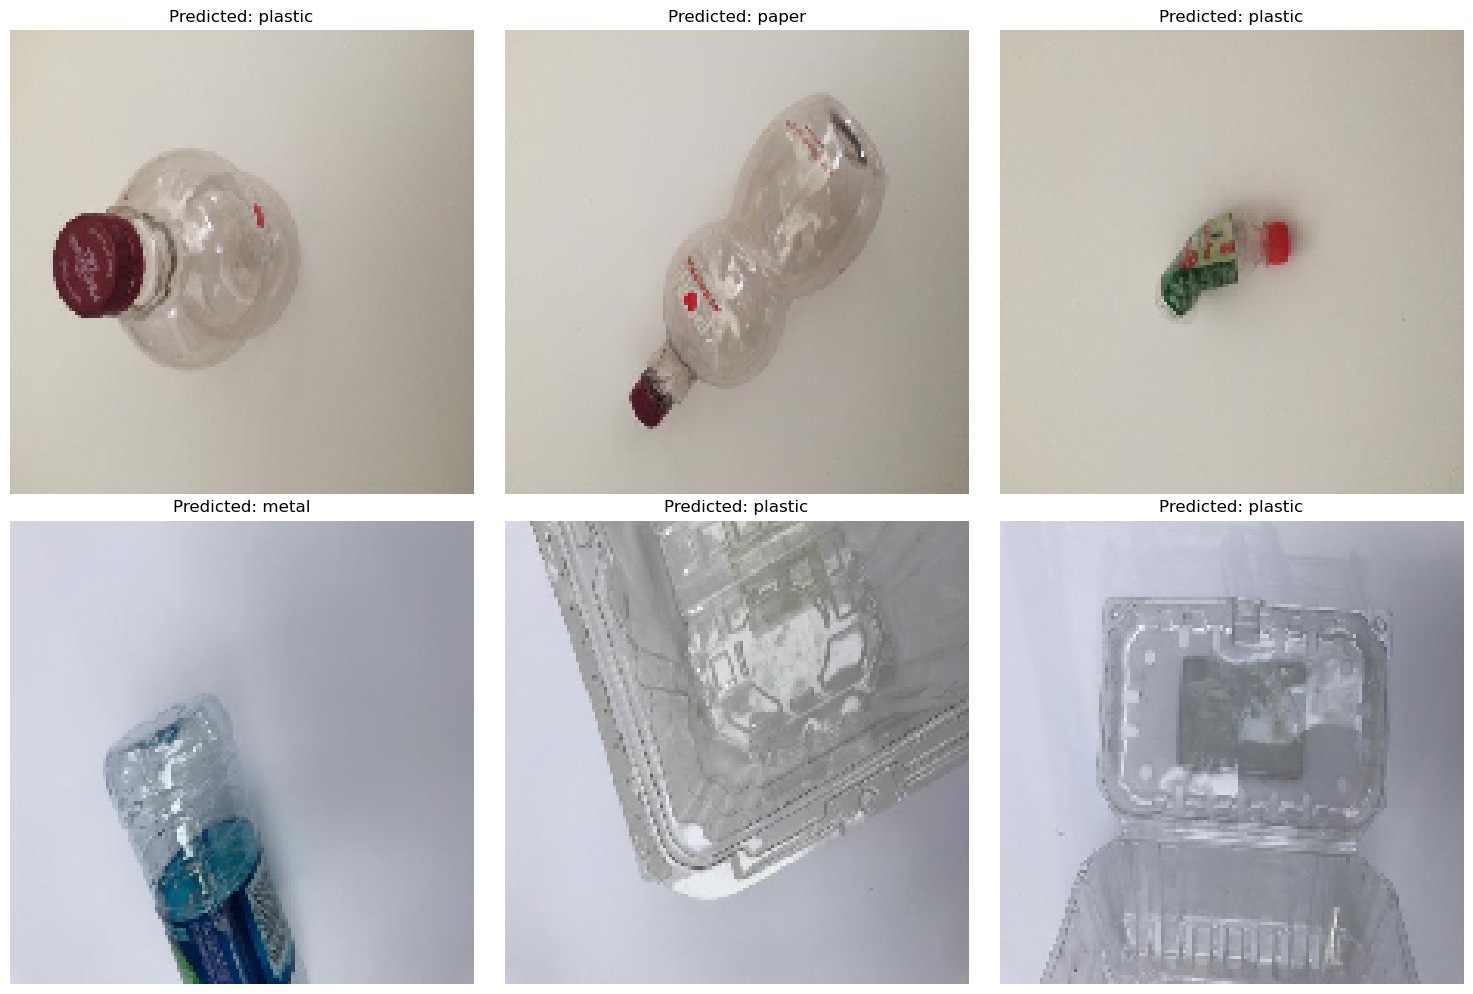

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


test_folder = 'data/garbage_images/plastic'
image_files = os.listdir(test_folder)

plt.figure(figsize=(15, 10))

for i, img_name in enumerate(image_files[:6]):
    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict class
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Plot image with predicted label
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Week 3 – Model Deployment Using Gradio


###  Objective

In Week 3, I deployed the trained CNN model using Gradio to create a simple web interface. This interface allows users to upload an image of garbage and get a prediction of its category.


In [2]:
pip install gradio


Note: you may need to restart the kernel to use updated packages.


###  Deployment Using app.py File

I created a separate file named `app.py` which contains the code to load the trained model, define the prediction function, and create a Gradio interface.

This file allows us to run the app independently of the notebook.


###  app.py Code

The following code was written inside `app.py` file in the project folder:


In [ ]:
import gradio as gr  
import numpy as np  
from tensorflow.keras.models import load_model  
from tensorflow.keras.preprocessing import image  
from PIL import Image  
  
# Load the trained model
model = load_model("garbage_classification_model.h5")  

# Class names
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']    

# Define prediction function
def classify(img):  
    img = img.resize((150, 150))    
    img_array = image.img_to_array(img)  
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  
    prediction = model.predict(img_array)  
    class_index = np.argmax(prediction)  
    class_label = class_names[class_index]  
    confidence = prediction[0][class_index]  
    return f"Predicted: {class_label} (Confidence: {confidence:.2f})"  

# Gradio Interface
interface = gr.Interface(fn=classify,   
                         inputs=gr.Image(type="pil"),   
                         outputs="text",  
                         title="Garbage Classification App")  
interface.launch()


###  How to Run the app.py File

Step 1: Open Anaconda Prompt

Step 2: Move to the project folder
 [cd C:\Users\LHCP\Desktop\garbage_classification_project]

Step 3: Activate the environment
 [conda activate garbage-env]

Step 4: Run the Gradio app
 [python app.py]

 A link like http://127.0.0.1:7860 will appear — open it in the browser to use the app.


## Garbage Classification Prediction Result

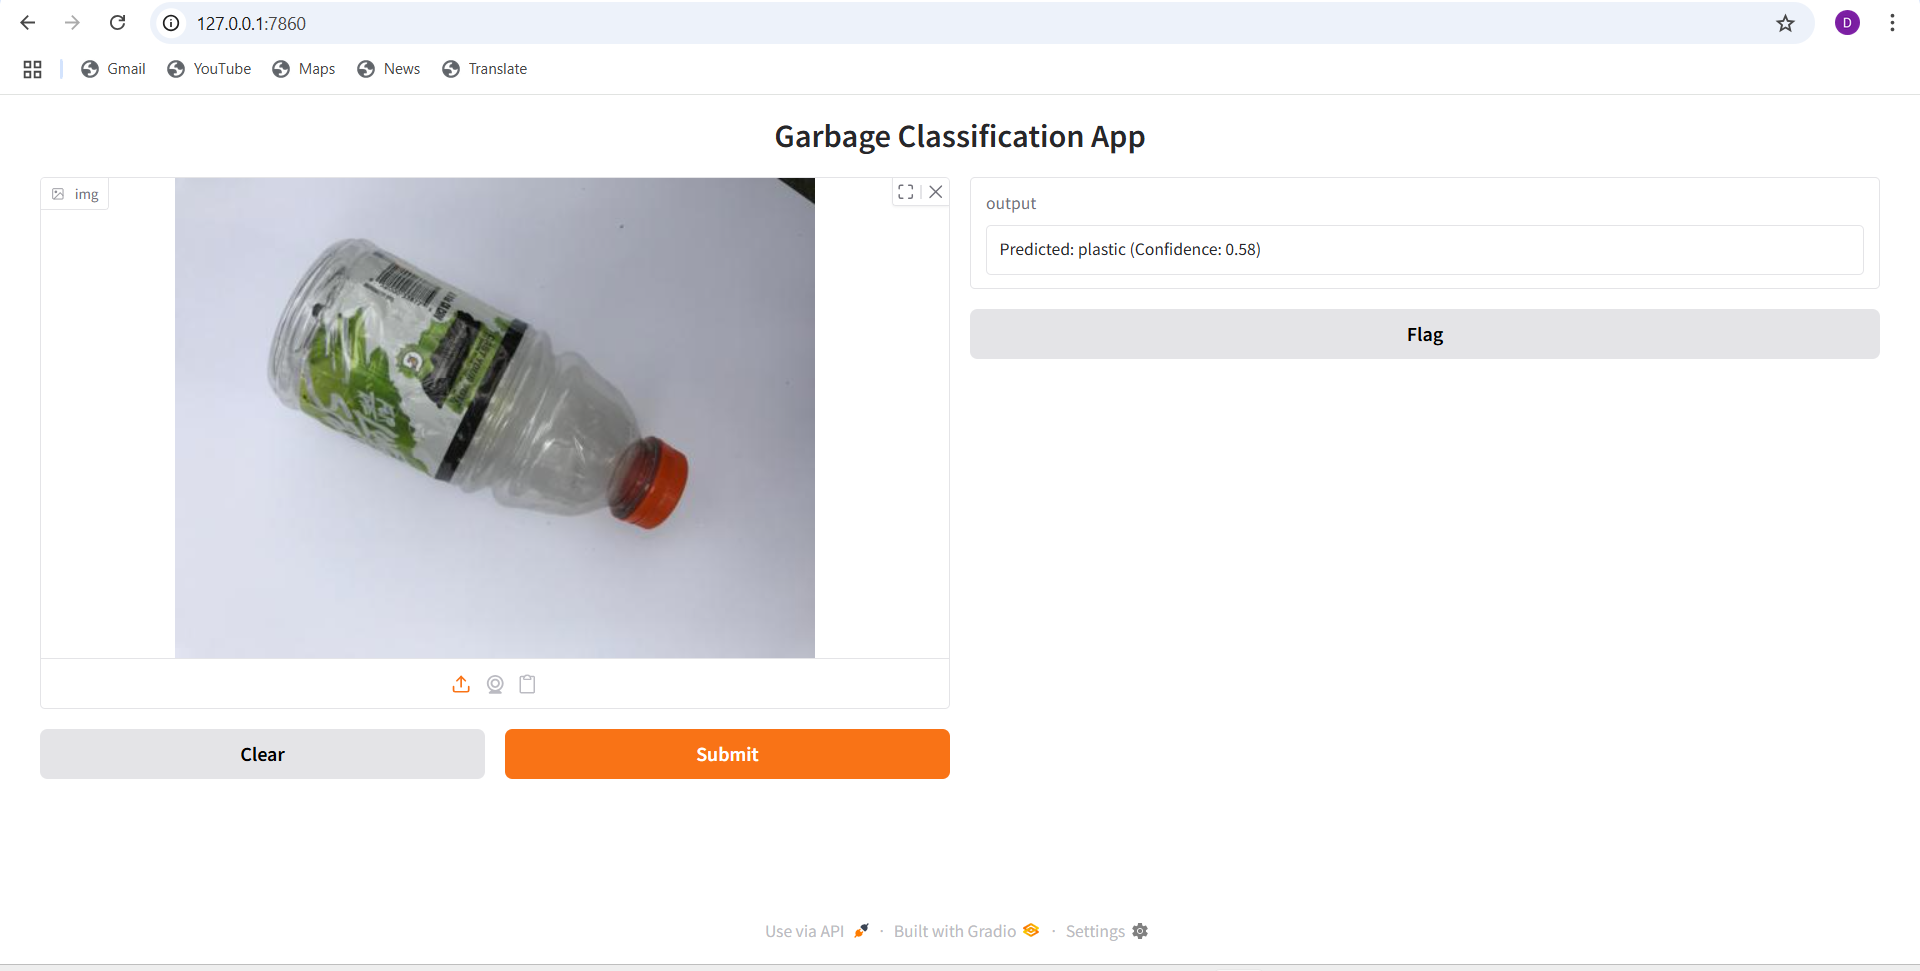

###  Conclusion

In this final phase of the Garbage Classification project, the trained CNN model was successfully deployed using Gradio. A simple and interactive web interface was created to allow users to upload garbage images and get real-time predictions along with confidence scores. This deployment step makes the model practically usable and easy to test.

The project helped me understand the complete ML pipeline — from data preprocessing and model building to evaluation and deployment. It gave me hands-on experience with tools like TensorFlow, Keras, and Gradio.

Overall, it was a great learning experience!

